In [1]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import requests as req
import pandas as pd

In [2]:
%matplotlib inline

In [2]:
# Save config information.
api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"
#url = "http://api.openweathermap.org/data/2.5/weather?"
url = "http://api.openweathermap.org/data/2.5/weather?lat=37.7799&lon=-121.9781"
units = "imperial"

# Build partial query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q="
response = req.get(query_url).json()
print(response)

{'cod': 401, 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}


In [4]:
weather_json_l = []
cities = ["Madrid",
          "Barcelona",
          "Paris",
          "Florence",
          "Venice",
          "Lausanne",
          "London",
          "Geneva",
          "Washington DC.",
          "Oslo",
          "Copenhagen",
          "Beijing",
          "San Francisco",
          "Newport Beach"] 

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = req.get(query_url + city).json()
    weather_json_l.append(response)

In [5]:
weather_json_l = []
cities = ["San Ramon,San Francisco"] 

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = req.get(query_url + city).json()
    print(response)

{'coord': {'lon': -85.84, 'lat': 12.92}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 69.68, 'pressure': 933.73, 'humidity': 85, 'temp_min': 69.68, 'temp_max': 69.68, 'sea_level': 1025.67, 'grnd_level': 933.73}, 'wind': {'speed': 4.41, 'deg': 35.5024}, 'clouds': {'all': 68}, 'dt': 1542522765, 'sys': {'message': 0.0038, 'country': 'NI', 'sunrise': 1542541403, 'sunset': 1542582822}, 'id': 3616584, 'name': 'San Ramon', 'cod': 200}


In [4]:
# Extract interesting data from responses
lat_data = [data.get("coord").get("lat") for data in weather_json_l]
temp_data = [data.get("main").get("temp") for data in weather_json_l]
city = [data.get("name") for data in weather_json_l]

weather_dict = {"Temperature (Fahrenheit)": temp_data, "Latitude": lat_data, "city":city}
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,Latitude,Temperature (Fahrenheit),city


In [6]:
weather_df.set_index("city", inplace=True)
weather_df

,Latitude,Temperature (Fahrenheit)
city,,
Madrid,40.42,32.88
Barcelona,41.38,39.20
Paris,48.86,31.53
Florence,34.80,77.45
Venice,27.10,81.27
Lausanne,46.52,28.45
London,51.51,33.13
Geneva,46.20,31.42
Washington DC.,38.90,44.71


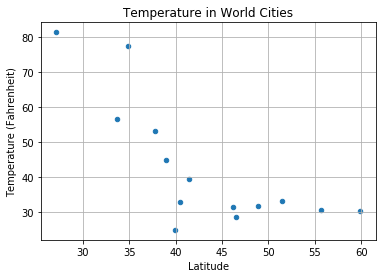

In [7]:
ax = weather_df.plot(kind="scatter",
                x="Latitude", 
                y="Temperature (Fahrenheit)",
                marker="o",
                title="Temperature in World Cities",
                grid=True
               );

In [63]:
"""
If you plotted with pandas, then save its return value,
call .get_figure(), then .savefig
"""
fig = ax.get_figure()
fig.savefig("TemperatureWorldCities1.png");

Here's another way to plot without using pandas.plot

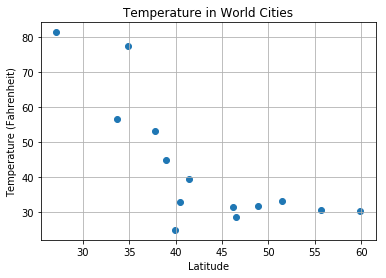

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Temperature (Fahrenheit)"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities2.png")

# Show plot
plt.show()